# Kronikod-----Model Hazırlanması ve Eğitilmesi-----Kronikod 

# Deep Learning ile Ses Tanıma ve sınıflandırma

Ses dosyalarımızı diğer defter yani onisleme.ipynb ile işlediğimize göre artol derin öğrenme algoritmasını kullanabiliriz.Çünkü yaptığımız işlemle yapay zekanın(bilgisayarın) anlayacağı biçime sesleri getirdik

Tensorflow ve Keras kullanarak katmanlar ve nöronlar oluşturup CNN(Convolutional Neural Network) mimarisi yapacağız.Kaç katman ve kaç nöron yapmamız gerektiğinin ön izlemesini http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.46740&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false sitesinden kurgulayıp yapacağız.Bu sayede daha verimli bir program yazmış olacağız.

Modeli train için rastgele ses sinyalleri ile eğiteceğiz ve ardından rastgele belirlenen ses sinyallerinin testini yapıp doğruluğunu hesaplatacağız

En son olarak internetteki rastgele sesleri modelimize soracağız ve bu sesler UrbanSound8k veri setinde yer almayanlar olmalı ki veriler harici seslerde verimlilik ölçebilelim.Dosyalar çok büyük olmadığı sürece sıkıntı çıkmayacaktır

### Kütphane Yüklemeleri Bölümü

In [7]:
!pip install librosa

In [8]:
!pip install tensorflow

In [9]:
!pip install opencv-python

In [10]:
!pip install numpy

In [11]:
!pip install pandas

In [12]:
!pip install matplotlib

In [13]:
#Alternatif Yükleme
!pip install seaborn

### Kütüphane Tanımlamaları Bölümü

In [14]:
#Kütüphanelerin tanımlaması
import numpy as np                                    #Numpy kütüphanesini içeri aktarma
import pandas as pd                                   #Pandas kütüphanesini içeri aktarma
import librosa as lb                                  #Librosa(Ses İşleme) kütüphanesini içeri aktarma
import cv2 as cv                                      #OpenCV (Görüntü İşleme) kütüphanesinin içeri aktarması
import matplotlib.pyplot as plt                       #Matplotlib kütüphanesini içeri aktarma
%matplotlib inline                                    
#Çıktıların not defterinde saklanması için gereken ifade

In [15]:
#Tensorflow tanımlama ve versiyon kontrolü
import tensorflow as tf        
print(tf.__version__)

2.10.0


In [16]:
#Diğer gerekli olabilecek kütüphanelerin tanımlanması
import os                                                #Os kütüphanesinin içeri aktarılması                                   
from tqdm import tqdm
#Tensorflow ve keras kütüphaneleri içeri aktarma
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime                             #Tarih saat kütüphanesinin içeri aktarılması


## CSV dosyalarını içeri alma

#### Buradaki dosyalar ön işleme dosyasında kaydettiğimiz csv dosyalarıdır.Bunları içeri alalım ki modelimizde kullanalım

In [ ]:
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv")
X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv")

In [42]:
X_test.shape

(2619, 42)

## CNN Modelini kurmaya başlayalım

CNN Modelinde Katmanlar ve Nöronlar bulunuyor.

Kaç tane hangisinden kullanacağımızı öğrenmek için tensorflow playgrounddan yardım almak faydalı olacaktır.

In [43]:
#Sınıf sayısını belirttik daha sonrasında kullanmak üzere 3 hidden layer 500 neuron
sinif_sayisi = 10

### CNN Modelin yapısı : Katmanlar ve içerisinde nöronların bulunacağı yapı

In [44]:
cnn_model = Sequential()        #model kurmak için Sequential a ihtiyaç var.cnn_model isimli değişkene atadık
#0.5 yüzde elli demek
#1.Gizli Katman
cnn_model.add(Dense(130,input_shape=(42,)))    #1.Gizli katman nöron sayısı input_shape= n_mfcc değeridirr
cnn_model.add(Activation("relu"))
cnn_model.add(Dropout(0.5))

#2.Gizli Katman
cnn_model.add(Dense(260))                      #2.Gizli katman nöron sayısı
cnn_model.add(Activation("relu"))      
cnn_model.add(Dropout(0.5))

#3.Gizli Katman
cnn_model.add(Dense(130))                      #3.Gizli katman nöron sayısı
cnn_model.add(Activation("relu"))
cnn_model.add(Dropout(0.5))

#Çıkış Katmanı
cnn_model.add(Dense(sinif_sayisi))             #Çıkış katmanı nöron sayısına sınıf sayısını yazdırıyoruz
cnn_model.add(Activation("softmax"))

In [45]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 130)               5590      
                                                                 
 activation_8 (Activation)   (None, 130)               0         
                                                                 
 dropout_6 (Dropout)         (None, 130)               0         
                                                                 
 dense_9 (Dense)             (None, 260)               34060     
                                                                 
 activation_9 (Activation)   (None, 260)               0         
                                                                 
 dropout_7 (Dropout)         (None, 260)               0         
                                                                 
 dense_10 (Dense)            (None, 130)              

In [46]:
cnn_model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer="adam")
#Modelin performans metriklerini, loss ve accuracy değerleri

In [69]:
epochs_sayisi = 310   #Epoch sayısı
yigin_sayisi = 32     #yığın sayısı

history = cnn_model.fit(X_train,y_train,batch_size=yigin_sayisi,epochs=epochs_sayisi,validation_data=(X_test,y_test),verbose=1)


Epoch 1/310
191/191 [==============================] - 0s 2ms/step - loss: 0.6010 - accuracy: 0.8000 - val_loss: 0.5067 - val_accuracy: 0.8450
Epoch 2/310
191/191 [==============================] - 0s 2ms/step - loss: 0.5890 - accuracy: 0.8015 - val_loss: 0.5131 - val_accuracy: 0.8438
Epoch 3/310
191/191 [==============================] - 0s 2ms/step - loss: 0.6116 - accuracy: 0.7981 - val_loss: 0.4986 - val_accuracy: 0.8435
Epoch 4/310
191/191 [==============================] - 0s 2ms/step - loss: 0.6092 - accuracy: 0.8015 - val_loss: 0.5192 - val_accuracy: 0.8354
Epoch 5/310
191/191 [==============================] - 0s 2ms/step - loss: 0.6114 - accuracy: 0.8030 - val_loss: 0.5170 - val_accuracy: 0.8373
Epoch 6/310
191/191 [==============================] - 0s 2ms/step - loss: 0.5984 - accuracy: 0.8058 - val_loss: 0.5047 - val_accuracy: 0.8370
Epoch 7/310
191/191 [==============================] - 0s 2ms/step - loss: 0.5969 - accuracy: 0.8077 - val_loss: 0.5242 - val_accuracy: 0.8335

Epoch 58/310
191/191 [==============================] - 0s 2ms/step - loss: 0.6225 - accuracy: 0.8038 - val_loss: 0.5374 - val_accuracy: 0.8331
Epoch 59/310
191/191 [==============================] - 0s 2ms/step - loss: 0.6044 - accuracy: 0.8053 - val_loss: 0.5340 - val_accuracy: 0.8312
Epoch 60/310
191/191 [==============================] - 0s 2ms/step - loss: 0.5962 - accuracy: 0.8094 - val_loss: 0.5228 - val_accuracy: 0.8412
Epoch 61/310
191/191 [==============================] - 0s 2ms/step - loss: 0.5979 - accuracy: 0.8031 - val_loss: 0.5217 - val_accuracy: 0.8400
Epoch 62/310
191/191 [==============================] - 0s 2ms/step - loss: 0.5726 - accuracy: 0.8156 - val_loss: 0.5132 - val_accuracy: 0.8366
Epoch 63/310
191/191 [==============================] - 0s 2ms/step - loss: 0.5866 - accuracy: 0.8058 - val_loss: 0.5239 - val_accuracy: 0.8370
Epoch 64/310
191/191 [==============================] - 0s 2ms/step - loss: 0.5892 - accuracy: 0.8110 - val_loss: 0.5205 - val_accuracy:

Epoch 115/310
191/191 [==============================] - 0s 2ms/step - loss: 0.6146 - accuracy: 0.8046 - val_loss: 0.5076 - val_accuracy: 0.8465
Epoch 116/310
191/191 [==============================] - 0s 2ms/step - loss: 0.6185 - accuracy: 0.8015 - val_loss: 0.5423 - val_accuracy: 0.8347
Epoch 117/310
191/191 [==============================] - 0s 2ms/step - loss: 0.5916 - accuracy: 0.8094 - val_loss: 0.5235 - val_accuracy: 0.8381
Epoch 118/310
191/191 [==============================] - 0s 2ms/step - loss: 0.6003 - accuracy: 0.8053 - val_loss: 0.5263 - val_accuracy: 0.8370
Epoch 119/310
191/191 [==============================] - 0s 2ms/step - loss: 0.6092 - accuracy: 0.7999 - val_loss: 0.5307 - val_accuracy: 0.8320
Epoch 120/310
191/191 [==============================] - 0s 2ms/step - loss: 0.5950 - accuracy: 0.8063 - val_loss: 0.5452 - val_accuracy: 0.8267
Epoch 121/310
191/191 [==============================] - 0s 2ms/step - loss: 0.6116 - accuracy: 0.8018 - val_loss: 0.5244 - val_ac

191/191 [==============================] - 0s 2ms/step - loss: 0.5841 - accuracy: 0.8056 - val_loss: 0.4929 - val_accuracy: 0.8423
Epoch 228/310
191/191 [==============================] - 0s 2ms/step - loss: 0.5907 - accuracy: 0.8056 - val_loss: 0.5148 - val_accuracy: 0.8396
Epoch 229/310
191/191 [==============================] - 0s 2ms/step - loss: 0.6048 - accuracy: 0.8030 - val_loss: 0.5221 - val_accuracy: 0.8339
Epoch 230/310
191/191 [==============================] - 0s 2ms/step - loss: 0.6232 - accuracy: 0.8027 - val_loss: 0.5440 - val_accuracy: 0.8293
Epoch 231/310
191/191 [==============================] - 0s 2ms/step - loss: 0.6092 - accuracy: 0.8027 - val_loss: 0.5061 - val_accuracy: 0.8469
Epoch 232/310
191/191 [==============================] - 0s 2ms/step - loss: 0.5684 - accuracy: 0.8118 - val_loss: 0.5040 - val_accuracy: 0.8404
Epoch 233/310
191/191 [==============================] - 0s 2ms/step - loss: 0.5732 - accuracy: 0.8074 - val_loss: 0.5295 - val_accuracy: 0.8381

## Accuracy(Doğruluk) Değerinin Grafiği

<function matplotlib.pyplot.show(close=None, block=None)>

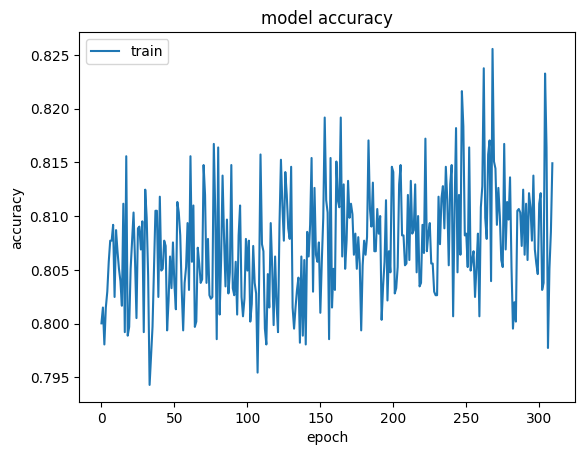

In [70]:
plt.plot(history.history["accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train"], loc="upper left")
plt.show

### Loss(Kayıp) Değerinin Grafiği

<function matplotlib.pyplot.show(close=None, block=None)>

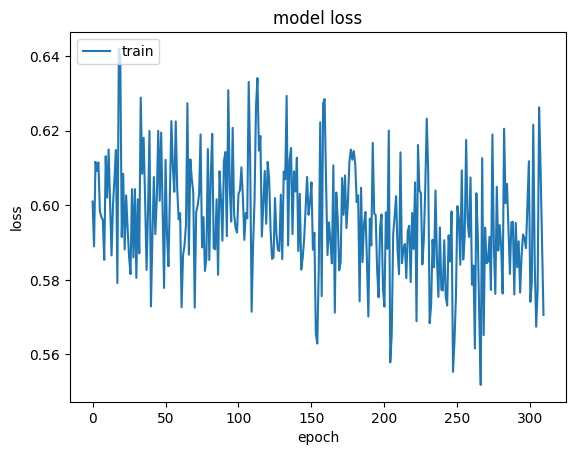

In [72]:
plt.plot(history.history["loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train"], loc="upper left")
plt.show

### Yüzde Doğruluk Değerinin Sorgusu

In [73]:
dogruluk_degeri = cnn_model.evaluate(X_test,y_test,verbose=0)
#Verimliliği yazdırdık modelimiz %84 verimle çalışıyor.Değerler ile oynayarak daha iyi sonuçlar bulabiliriz
print(dogruluk_degeri[1])

0.8392516374588013


## Artık Farklı Verilerle Modeli Test Edebiliriz

In [74]:
#UrbanSound8K içerisinden herhangi bir ses dosyasını librosa ile içeri aktaralım
test_dosya = "38236-3-2-2.wav"
ses_sinyal , ses_oran = lb.load(test_dosya,res_type="kaiser_fast")
mfcc_islemi = lb.feature.mfcc(y=ses_sinyal,sr=ses_oran,n_mfcc=42)
mfcc_olcek = np.mean(mfcc_islemi.T,axis=0)
#Buradaki işlemler yukarıdaki librosa ile yaptığımız MFCC işlemleri ile aynıdır

In [75]:
print(mfcc_olcek)

[-5.2573273e+02  8.5783485e+01 -5.7746100e-01 -2.2641846e+01
 -2.6458672e+01 -1.1179856e+01 -1.6260969e+01 -6.0961499e+00
 -1.4525273e+01 -1.3000365e+01 -9.6196852e+00 -5.9997029e+00
 -3.4947946e+00  1.8680022e+00 -2.6686811e+00  2.8264639e+00
  3.0015950e+00  4.7593713e+00 -3.4436661e-01 -1.3878559e+00
 -7.9882705e-01  8.3521634e-01  4.7232240e-01  7.5178522e-01
  2.8322675e+00  1.6039457e+00 -1.6205764e+00  1.3539650e+00
  1.1525562e+00  1.4093673e+00  2.3169208e+00  3.6881480e+00
  3.1805613e+00  1.0368627e+00 -1.0569396e+00 -4.0278229e-01
 -7.3493177e-01 -7.5945067e-01 -7.0470113e-01 -2.2253833e+00
 -1.5836024e+00 -4.2672360e-01]


In [76]:
#MFCC ölçeğini reshape yapıyoruz
mfcc_olcek = mfcc_olcek.reshape(1,-1)
#aslında işlem olarak satırı sütün sütunu satır yapma gibi düşünebiliriz

In [77]:
mfcc_olcek.shape     #Reshape yaptıktan sonra satır ve sutunlarına bakıyoruz

(1, 42)

In [78]:
print(mfcc_olcek)

[[-5.2573273e+02  8.5783485e+01 -5.7746100e-01 -2.2641846e+01
  -2.6458672e+01 -1.1179856e+01 -1.6260969e+01 -6.0961499e+00
  -1.4525273e+01 -1.3000365e+01 -9.6196852e+00 -5.9997029e+00
  -3.4947946e+00  1.8680022e+00 -2.6686811e+00  2.8264639e+00
   3.0015950e+00  4.7593713e+00 -3.4436661e-01 -1.3878559e+00
  -7.9882705e-01  8.3521634e-01  4.7232240e-01  7.5178522e-01
   2.8322675e+00  1.6039457e+00 -1.6205764e+00  1.3539650e+00
   1.1525562e+00  1.4093673e+00  2.3169208e+00  3.6881480e+00
   3.1805613e+00  1.0368627e+00 -1.0569396e+00 -4.0278229e-01
  -7.3493177e-01 -7.5945067e-01 -7.0470113e-01 -2.2253833e+00
  -1.5836024e+00 -4.2672360e-01]]


In [79]:
print(mfcc_olcek.shape)

(1, 42)


In [80]:
sonuc_dizi = cnn_model.predict(mfcc_olcek)    #cnn modelimize haber veriyoruz test ediyor

1/1 [==============================] - 0s 59ms/step


In [81]:
sonuc_dizi         

array([[2.8462278e-36, 1.1535031e-22, 8.1436684e-22, 1.0000000e+00,
        1.3602435e-21, 3.5884201e-26, 2.1865049e-12, 0.0000000e+00,
        2.7851916e-19, 1.2844072e-23]], dtype=float32)

In [82]:
sonuc_siniflari = ["air_conditioner","car_horn","children_playing","dog_bark","drilling", "engine_idling", "gun_shot", "jackhammer", "siren", "street_music"]

sonuc = np.argmax(sonuc_dizi[0])
print(sonuc_siniflari[sonuc])

dog_bark


## Opsiyonel Bölüm

### Burada doğru dizini yazarak klasördeki bütün resim(spectrogram) dosyalarını grayscale olarak içeriye aktarır

In [83]:
air_conditioner = 'İşlem yapılacak klasör dizini'
Files0 = os.listdir(air_conditioner)
for File in Files0:
    imgPath = os.path.join(air_conditioner,File)
    print(imgPath)
    image = cv.imread(imgPath,image = cv.imread(imgPath,cv.IMREAD_GRAYSCALE))
    cv.imwrite(f'..kaydedilecek klasör dizini/gray_{File}',image)   #f li yapı kullanıp yaparak her resmin ayrı adının olmasını sağladık
#    cv.waitKey(0)
#cv.destroyAllWindows()

### Burada doğru dizinleri yazarsak spektrogramların gri halini imshow olarak bize aktarır.

In [ ]:
air_conditioner = 'İşlem yapılacak klasör dizini'
Files0 = os.listdir(air_conditioner)
for File in Files0:
    imgPath = os.path.join(air_conditioner,File)
    print(imgPath)
    image = cv.imread(imgPath,image = cv.imread(imgPath,cv.IMREAD_GRAYSCALE))
    cv.imshow("image",image)
    cv.waitKey(0)
cv.destroyAllWindows